In [1]:
import pandas as pd #pacote do python usado para ciência de dados/análise de dados
import matplotlib.pyplot as plt # biblioteca gráfica
import numpy as np # arrays numéricos
import seaborn as sns # biblioteca gráfica extendida da Matplotlib

In [2]:
# importando base de dados
df = pd.read_csv('arquivo/ocorrencias_cenipa.csv')

In [11]:
# Visão geral dos dados
df.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


In [10]:
# listar as colunas do DataFrame
list(df.columns)

['codigo',
 'tipo',
 'descricao',
 'cidade',
 'estado',
 'data',
 'ano',
 'hora',
 'aeronave_liberada',
 'status_investigacao',
 'aeronaves_envolvidas',
 'ocorrencia_saida_pista',
 'aeronave_tipo',
 'aeronave_fabricante',
 'motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_assentos',
 'aeronave_ano_fabricacao',
 'aeronave_pais_fabricante',
 'aeronave_fase_operacao',
 'aeronave_nivel_dano']

In [3]:
# verificando o tipo de cada coluna no DataFrame
df.dtypes

codigo                        int64
tipo                         object
descricao                    object
cidade                       object
estado                       object
data                         object
ano                           int64
hora                         object
aeronave_liberada            object
status_investigacao          object
aeronaves_envolvidas          int64
ocorrencia_saida_pista       object
aeronave_tipo                object
aeronave_fabricante          object
motor_tipo                   object
aeronave_motor_quantidade    object
aeronave_assentos             int64
aeronave_ano_fabricacao       int64
aeronave_pais_fabricante     object
aeronave_fase_operacao       object
aeronave_nivel_dano          object
dtype: object

In [4]:
# convertendo coluna ano de int64 para str
df['ano'] = df['ano'].astype(str)

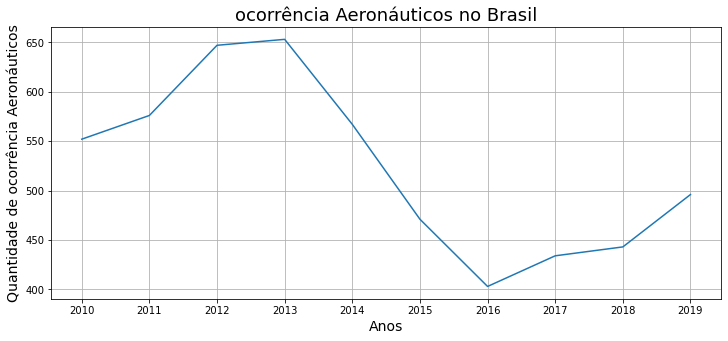

In [5]:
# pegando cada ano do DataFrame
anos_brasil = df['ano'].unique()

# lista vazia
qtdAcidentesBrasil = []

# tamanho do grafico
fig, ax = plt.subplots(figsize=(12, 5))

# titulo do grafico
ax.set_title("ocorrência Aeronáuticos no Brasil", fontsize=18)

# titulo do eixo Y
ax.set_ylabel("Quantidade de ocorrência Aeronáuticos", fontsize=14)

# titulo do eixo X
ax.set_xlabel("Anos", fontsize=14)

# loop para fazer a query e trazer a quantidade de ocorrencia por ano no brasil de 2010 a 2019
for i in anos_brasil:
    querytest1  = len(df[(df['ano'] == i)])
    qtdAcidentesBrasil.append(querytest1)

# codigo para a criação do grafico
plt.plot(anos_brasil, qtdAcidentesBrasil)

#função para colocar grade dentro da figura
plt.grid()

# mostrar o grafico
plt.show()

Através desse gráfico nota-se a quantidade de acidentes por ano no Brasil, nos anos de 2010 à 2019.

A quantidade de ocorrência variou muito ao longo dos anos, podemos notar os seguintes números: 
2010 = 552; 2011 = 576; 2012 = 647; 2013 = 653; 2014 = 567; 2015 = 471; 2016 = 403; 2017 = 434; 2018 = 443; 2019 = 496.

No ano de 2013 é possível observar uma maior quantidade de ocorrências, onde despencou ata o ano de 2016 e após isso os números voltaram a subir.

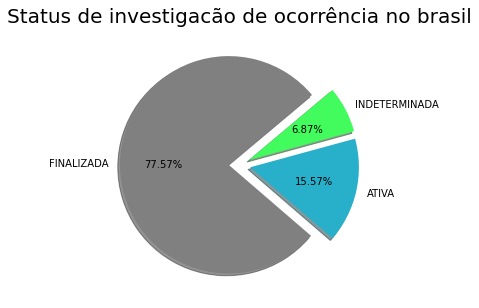

In [6]:
# pegando quantidade de valores de cada estatus da coluna status_investigacao e transformando em lista
status_investigacao = df['status_investigacao'].value_counts()

# cores do grafico
colors = ["Grey", "#28afc9", "#42fc5e"]

# tamanho do grafico
fig, ax = plt.subplots(figsize=(12, 5))

# tupla de valores que representa o deslocamento de uma parte do grafico
explode = (0.1, 0.1, 0.1)

# codigo para a criação do grafico
df['status_investigacao'].value_counts().plot(kind='pie', autopct="%.2f%%", label= '', shadow=True, explode=explode, startangle=40, colors=colors )

# titulo e tamnho da fonte
ax.set_title('Status de investigacão de ocorrência no brasil', fontsize=20)

# mostrar o grafico
plt.show()

É notável que a grande maioria das apurações foram finalizadas e solucionadas, totalizando em 77,57%.

Há uma minoria que ainda continua em status indeterminado totalizando 6,87%, ou seja, não houve uma apuração concreta. 

E ainda há casos em processamento, onde estão sendo analisadas as informações, os mesmos são denominados de ativos, que possuem um percentual de 15,57%. 

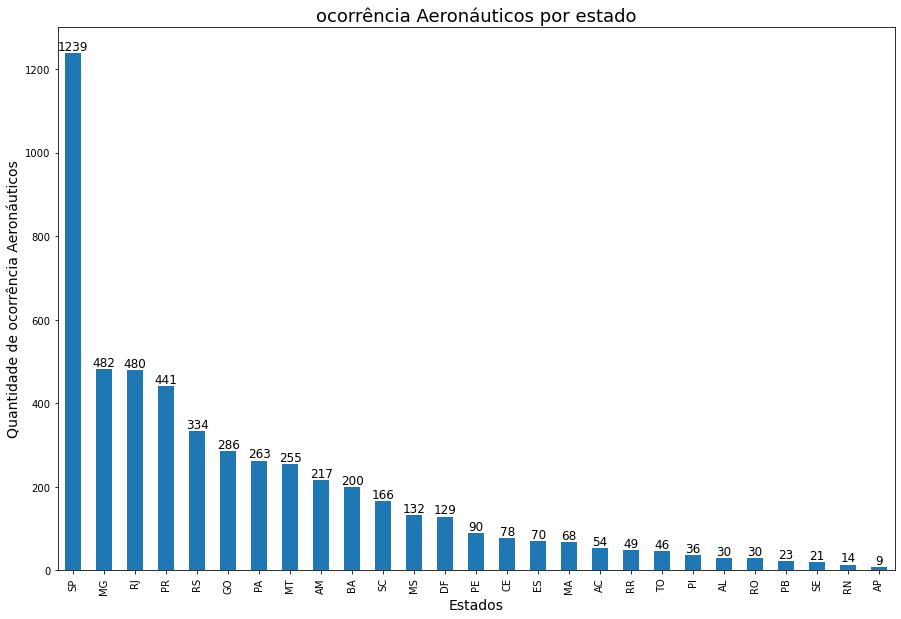

In [7]:
# tamanho do grafico
fig, ax = plt.subplots(figsize=(15, 10))

# codigo para a criação do grafico
plot = df['estado'].value_counts().plot(kind = "bar", label= '')

# titulo do grafico
ax.set_title("ocorrência Aeronáuticos por estado", fontsize=18)

# titulo do eixo Y
ax.set_ylabel("Quantidade de ocorrência Aeronáuticos", fontsize=14)

# titulo do eixo X
ax.set_xlabel("Estados", fontsize=14)

# loop para capturar os valores e colocar em cima de cada coluna conrespondente
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                 ha='center', va='baseline', fontsize=12,
                 color='black', xytext=(0,3),
                  textcoords='offset points')

# mostrar o grafico    
plt.show()

No gráfico acima, podemos analisar a quantidade de ocorrências nos estados brasileiros. 

É possível notar que o estado de São Paulo possui um grande destaque comparando-o com os outros. Há mais de 700 casos  com relação ao segundo lugar, que é o estado de minas gerais.

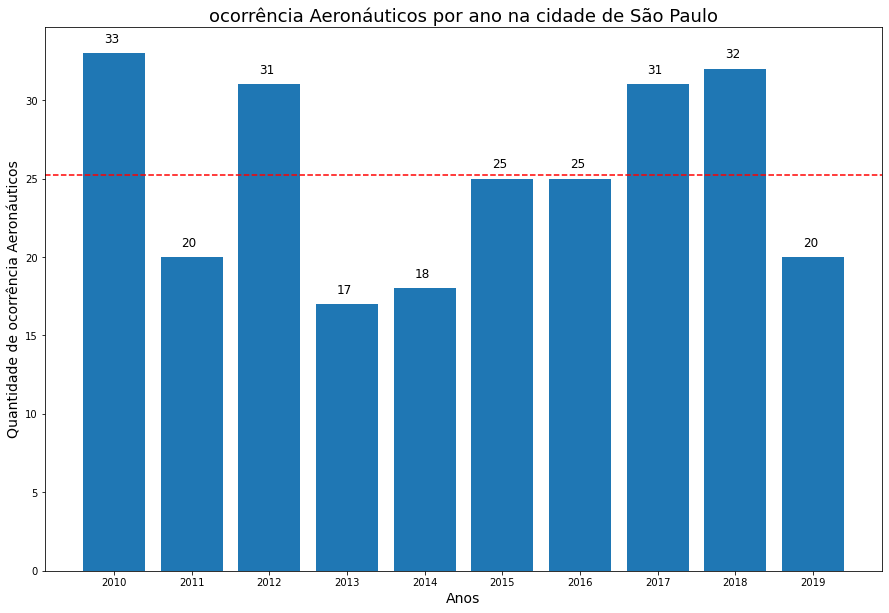

In [8]:
# lista vazia 
qtdOcorrenciaCidadeSP = []

# loop para fazer a query e trazer quantidade de occorecias na cidade de São Paulo por ano de 2010 a 2019
for i in anos_brasil:
    querytest  = len(df[(df['cidade'] == 'SÃO PAULO') & (df['ano'] == i)])
    qtdOcorrenciaCidadeSP.append(querytest)  

# função para megar a media da lista qtdOcorrenciaCidadeSP    
media = np.mean(qtdOcorrenciaCidadeSP)

# tamanho do grafico
fig, ax = plt.subplots(figsize=(15, 10))

# codigo para a criação do grafico
a = ax.bar(anos_brasil, qtdOcorrenciaCidadeSP)

# criando uma linha mediana
plt.axhline(media, 0, 1, color='r', **{'ls':'--'})

# titulo do grafico
ax.set_title("ocorrência Aeronáuticos por ano na cidade de São Paulo", fontsize=18)

# titulo do eixo Y
ax.set_ylabel("Quantidade de ocorrência Aeronáuticos", fontsize=14)

# titulo do eixo X
ax.set_xlabel("Anos", fontsize=14)

# loop para capturar os valores e colocar em cima de cada coluna conrespondente
for idx, val in enumerate(qtdOcorrenciaCidadeSP):
    txt = f'{val}'
    y_coord = val + 0.7
    x_coord = idx - 0.13
    
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

# mostrar o grafico
plt.show()

No gráfico acima, notamos a quantidade de acidentes por ano na cidade de São Paulo.

Ao analisarmos o grafico podemos observar que 2010 é ano com maiores casos com relação à 2011,2013,2014,2015,2016 e 2019 que se encontraram abaixo da média por todo esse período.

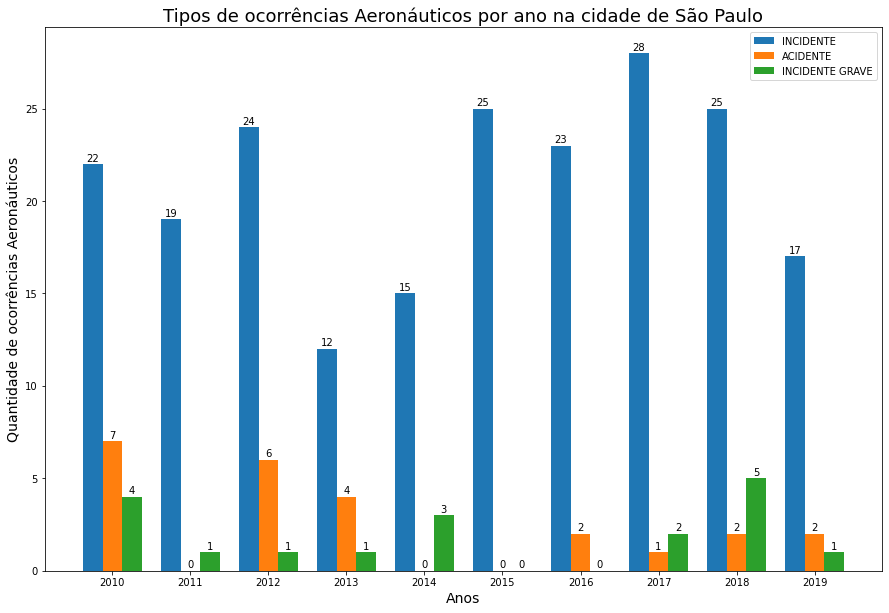

In [9]:
# listas vazias
incidentesSP      = []
acidentesSP       = []
incidentesGraveSP = []

# loop para fazer as querys pegarem as quantidade de INCIDENTE, ACIDENTE E INCIDENTES GRAVES de cada ano de 2010 a 2019
for i in anos_brasil:
    querytest1  = len(df[(df['cidade'] == 'SÃO PAULO') & (df['tipo'] == 'INCIDENTE') & (df['ano'] == i)])
    incidentesSP.append(querytest1)
    
    querytest2 = len(df[(df['cidade'] == 'SÃO PAULO') & (df['tipo'] == 'ACIDENTE') & (df['ano'] == i)])
    acidentesSP.append(querytest2)
    
    querytest3  = len(df[(df['cidade'] == 'SÃO PAULO') & (df['tipo'] == 'INCIDENTE GRAVE') & (df['ano'] == i)])
    incidentesGraveSP.append(querytest3)
    
# tamanho da largura das colunas
width = 0.25
x = np.arange(len(anos_brasil))

# tamanho do grafico
fig, ax = plt.subplots(figsize=(15, 10))

# codigo para a criação do grafico de incidente
graf1 = ax.bar(x - 0.25, incidentesSP, width, label='INCIDENTE' )

# codigo para a criação do grafico de acidente
graf2 = ax.bar(anos_brasil, acidentesSP, width, label='ACIDENTE')

# # codigo para a criação do grafico de incidente grave
graf3 = ax.bar(x + 0.25, incidentesGraveSP, width, label='INCIDENTE GRAVE')

# titulo do grafico
ax.set_title("Tipos de ocorrências Aeronáuticos por ano na cidade de São Paulo", fontsize=18)

# legenda do eixo Y 
ax.set_ylabel("Quantidade de ocorrências Aeronáuticos", fontsize=14)

# legenda do eixo X 
ax.set_xlabel("Anos", fontsize=14)

# função para legendas
ax.legend()

# legendas
ax.bar_label(graf1, padding=1)
ax.bar_label(graf2, padding=1)
ax.bar_label(graf3, padding=1)
    
# mostrar o grafico
plt.show()


Conforme a análise do gráfico, podemos notar os tipos de ocorrências que se dão por ano na cidade de São Paulo.

A diferença entre os tipos de ocorrência denominados de acidente e incidente são estabelecidas como um parâmetro entre as consequências.

O acidente apresenta algum tipo de prejuízo, sendo ele de lesão ou trauma, enquanto o incidente não apresenta nenhuma dessas características.

Entretanto, um incidente grave é associado à uma operação, seja ela acontecendo sob circunstâncias que possam afetar ou que afete a segurança de alguma execução.